# 1083 Albumin Initial ML

### By: Ian Weimer

In [13]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [15]:
df = pd.read_csv('K85_matched_2.csv')

In [16]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

## Select Only Patients Who Lived (Removing Patients in 0 Class Who Died)

In [17]:
df = df.loc[df['90_day_mortality'] == 0]

In [18]:
df.shape

(5263, 17)

In [19]:
df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA  SEWS  \
0  2dc21f88-780f-49ff-8869-9b859454cb25    1          0    0      1     1   
1  b41e918b-0767-41a8-97bd-cebb56dadb92    1          0    1      3     5   
2  c51a4a13-b8e9-4c35-bc11-c3443f668b06    1          0    0      1     2   
3  92e7d39f-a88c-48af-a64d-d7ad52cd08d0    0          1    4      1     1   
4  d2ea8946-63ac-46fc-b0cc-c41a31f2dda4    0          1    3      1     1   

   LVR  propensity_score  propensity_logit  albumin_24hrs  \
0    0          0.710132          0.896024              1   
1    0          0.975129          3.668856              1   
2    0          0.770494          1.211100              1   
3    0          0.886667          2.057142              1   
4    0          0.851459          1.746093              1   

                               personid   LOS_days  90_day_mortality  \
0  0101df2c-9e73-43f3-8a86-3804062428ea   2.841667                 0   
1  020382ec-fec4-4cfd-90a8-9648a9908768   3.568958                 0   
2  2659d580-6afc-4e49-b02c-cfdb6b417d3a  21.113889                 0   
3  28ca1cb5-ba48-49d2-9ea6-402605244827   6.850556                 0   
4  37dd3925-89b8-4f2f-ba94-ea913e692a00   6.551389                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 0.0                  87             2.0        1  
1                 1.0                  68             2.0        1  
2                 0.0                  29             1.0        1  
3                 1.0                  12             2.0        1  
4                 0.0                  84             2.0        1

In [20]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    2421.000000
mean       11.979491
std        10.576372
min         0.132060
25%         4.665972
50%         8.468056
75%        15.868750
max        53.249722
Name: LOS_days, dtype: float64

In [21]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    2842.000000
mean        7.027113
std         7.561829
min         0.000000
25%         2.518924
50%         4.829317
75%         8.698264
max        52.900000
Name: LOS_days, dtype: float64

In [22]:
df[df['albumin_24hrs'] == 1].hospital_free_days.describe()

count    2421.000000
mean       51.230896
std        31.299658
min         0.000000
25%        19.000000
50%        61.000000
75%        81.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [23]:
df[df['albumin_24hrs'] == 0].hospital_free_days.describe()

count    2842.000000
mean       56.056650
std        31.912962
min         0.000000
25%        24.000000
50%        71.000000
75%        85.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [24]:
df.drop(columns=['propensity_score', 'propensity_logit', 'encounterid', 'personid', 'albumin', 'albumin_timing'], inplace=True)

In [25]:
df.drop(columns=['90_day_mortality', '90_day_readmission', 'LOS_days'], inplace=True)

In [26]:
df.shape

(5263, 8)

In [27]:
df.describe()

ICU    Cirrhosis          CCI        qSOFA         SEWS  \
count  5263.000000  5263.000000  5263.000000  5263.000000  5263.000000   
mean      0.297929     0.376211     3.358921     0.721072     1.575527   
std       0.457392     0.484480     2.741803     0.783783     1.789775   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     0.000000   
50%       0.000000     0.000000     3.000000     1.000000     1.000000   
75%       1.000000     1.000000     5.000000     1.000000     2.000000   
max       1.000000     1.000000    15.000000     3.000000    10.000000   

               LVR  albumin_24hrs  hospital_free_days  
count  5263.000000    5263.000000         5263.000000  
mean      0.194186       0.460004           53.836785  
std       0.395610       0.498445           31.720651  
min       0.000000       0.000000            0.000000  
25%       0.000000       0.000000           22.000000  
50%       0.000000       0.000000           66.000000  
75%       0.000000       1.000000           84.000000  
max       1.000000       1.000000           90.000000

In [28]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [29]:
#df['LOS_days'] = df['LOS_days']/24
#df.drop(columns=['LOS_days'], inplace=True)

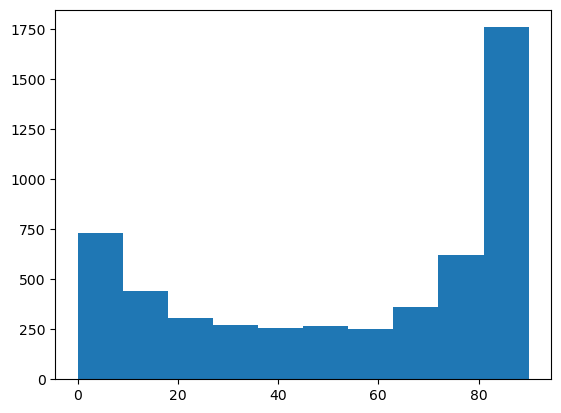

In [30]:
plt.hist(df['hospital_free_days']);

In [31]:
df['hospital_free_days'].describe()

count    5263.000000
mean       53.836785
std        31.720651
min         0.000000
25%        22.000000
50%        66.000000
75%        84.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [32]:
# Calculate Tertiles

q1 = df['hospital_free_days'].quantile(q=(1/3))
q2 = df['hospital_free_days'].quantile(q=(2/3))
print(q1)
print(q2)

36.0
81.0


In [33]:
# bin the LOS_days var

HFD = df['hospital_free_days']
m = max(HFD)

bins = [0, 35, 79, m]
labels=[0, 1, 2]

# 0 - Low HFD
# 1 - Medium HFD
# 2 - High/Long HFD

df['hospital_free_days'] = pd.cut(HFD, bins=bins, labels=labels, include_lowest=True)

In [34]:
df['hospital_free_days'].value_counts()

2    1855
0    1751
1    1657
Name: hospital_free_days, dtype: int64

## Modeling

In [35]:
# establish target feature, LOS_days, as y feature
y = df['hospital_free_days']
# drop target feature from features dataframe
X = df.drop(columns = ['hospital_free_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [36]:
cols

Index(['ICU', 'Cirrhosis', 'CCI', 'qSOFA', 'SEWS', 'LVR', 'albumin_24hrs'], dtype='object')

## Standardize Data

In [37]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [38]:
X.head()

ICU  Cirrhosis  CCI  qSOFA  SEWS  LVR  albumin_24hrs
0    1          0    0      1     1    0              1
1    1          0    1      3     5    0              1
2    1          0    0      1     2    0              1
3    0          1    4      1     1    0              1
4    0          1    3      1     1    0              1

In [39]:
X.shape

(5263, 7)

## Train Test Split

In [40]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [41]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [42]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [43]:
y_train.value_counts()

2    1483
0    1406
1    1321
Name: hospital_free_days, dtype: int64

## Multinomial Logistic Regression

In [44]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.07655
Feature: Cirrhosis Score: 0.12031
Feature: CCI Score: 0.03739
Feature: qSOFA Score: -0.12308
Feature: SEWS Score: 0.04917
Feature: LVR Score: 0.15755
Feature: albumin_24hrs Score: 0.10672


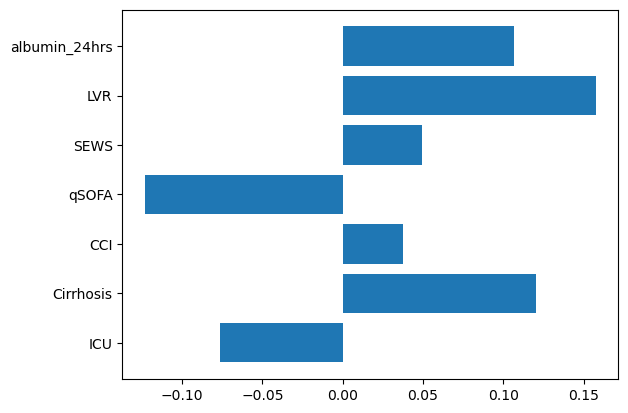

In [45]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

               Importance
LVR              1.170641
Cirrhosis        1.127842
albumin_24hrs    1.112624
SEWS             1.050395
CCI              1.038101
ICU              0.926309
qSOFA            0.884190


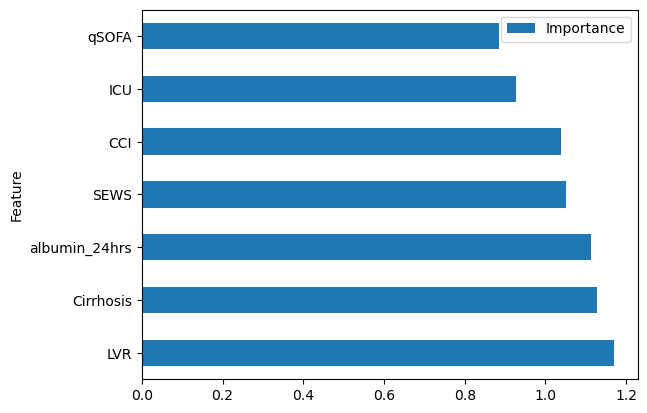

In [46]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [47]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [48]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[551 294 561]
 [409 389 523]
 [371 252 860]]


In [49]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.41      0.39      0.40      1406
           1       0.42      0.29      0.34      1321
           2       0.44      0.58      0.50      1483

    accuracy                           0.43      4210
   macro avg       0.42      0.42      0.42      4210
weighted avg       0.42      0.43      0.42      4210



In [50]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[124  83 138]
 [106  98 132]
 [ 87  56 229]]


In [51]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.39      0.36      0.37       345
           1       0.41      0.29      0.34       336
           2       0.46      0.62      0.53       372

    accuracy                           0.43      1053
   macro avg       0.42      0.42      0.41      1053
weighted avg       0.42      0.43      0.42      1053



## 1: Decision Tree 

In [52]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: ICU Score: 0.13935
Feature: Cirrhosis Score: 0.03291
Feature: CCI Score: 0.39039
Feature: qSOFA Score: 0.06506
Feature: SEWS Score: 0.15419
Feature: LVR Score: 0.02367
Feature: albumin_24hrs Score: 0.19444


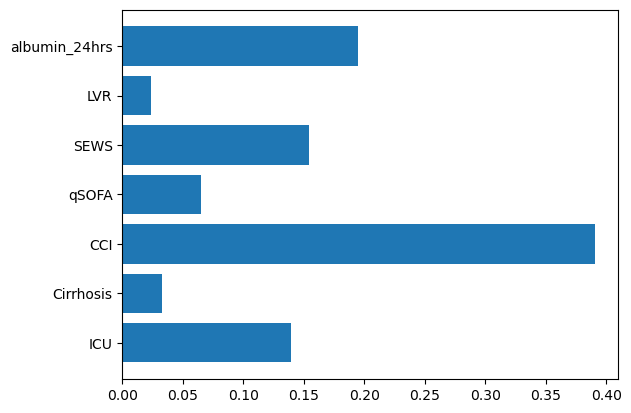

In [53]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [54]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[602 358 446]
 [417 472 432]
 [384 323 776]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1406
           1       0.41      0.36      0.38      1321
           2       0.47      0.52      0.49      1483

    accuracy                           0.44      4210
   macro avg       0.44      0.44      0.43      4210
weighted avg       0.44      0.44      0.44      4210



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[136  95 114]
 [113 110 113]
 [111  80 181]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39       345
           1       0.39      0.33      0.35       336
           2       0.44      0.49      0.46       372

    accuracy                           0.41      1053
   macro avg       0.40      0.40      0.40      1053
weighted avg       0.40      0.41      0.40      1053



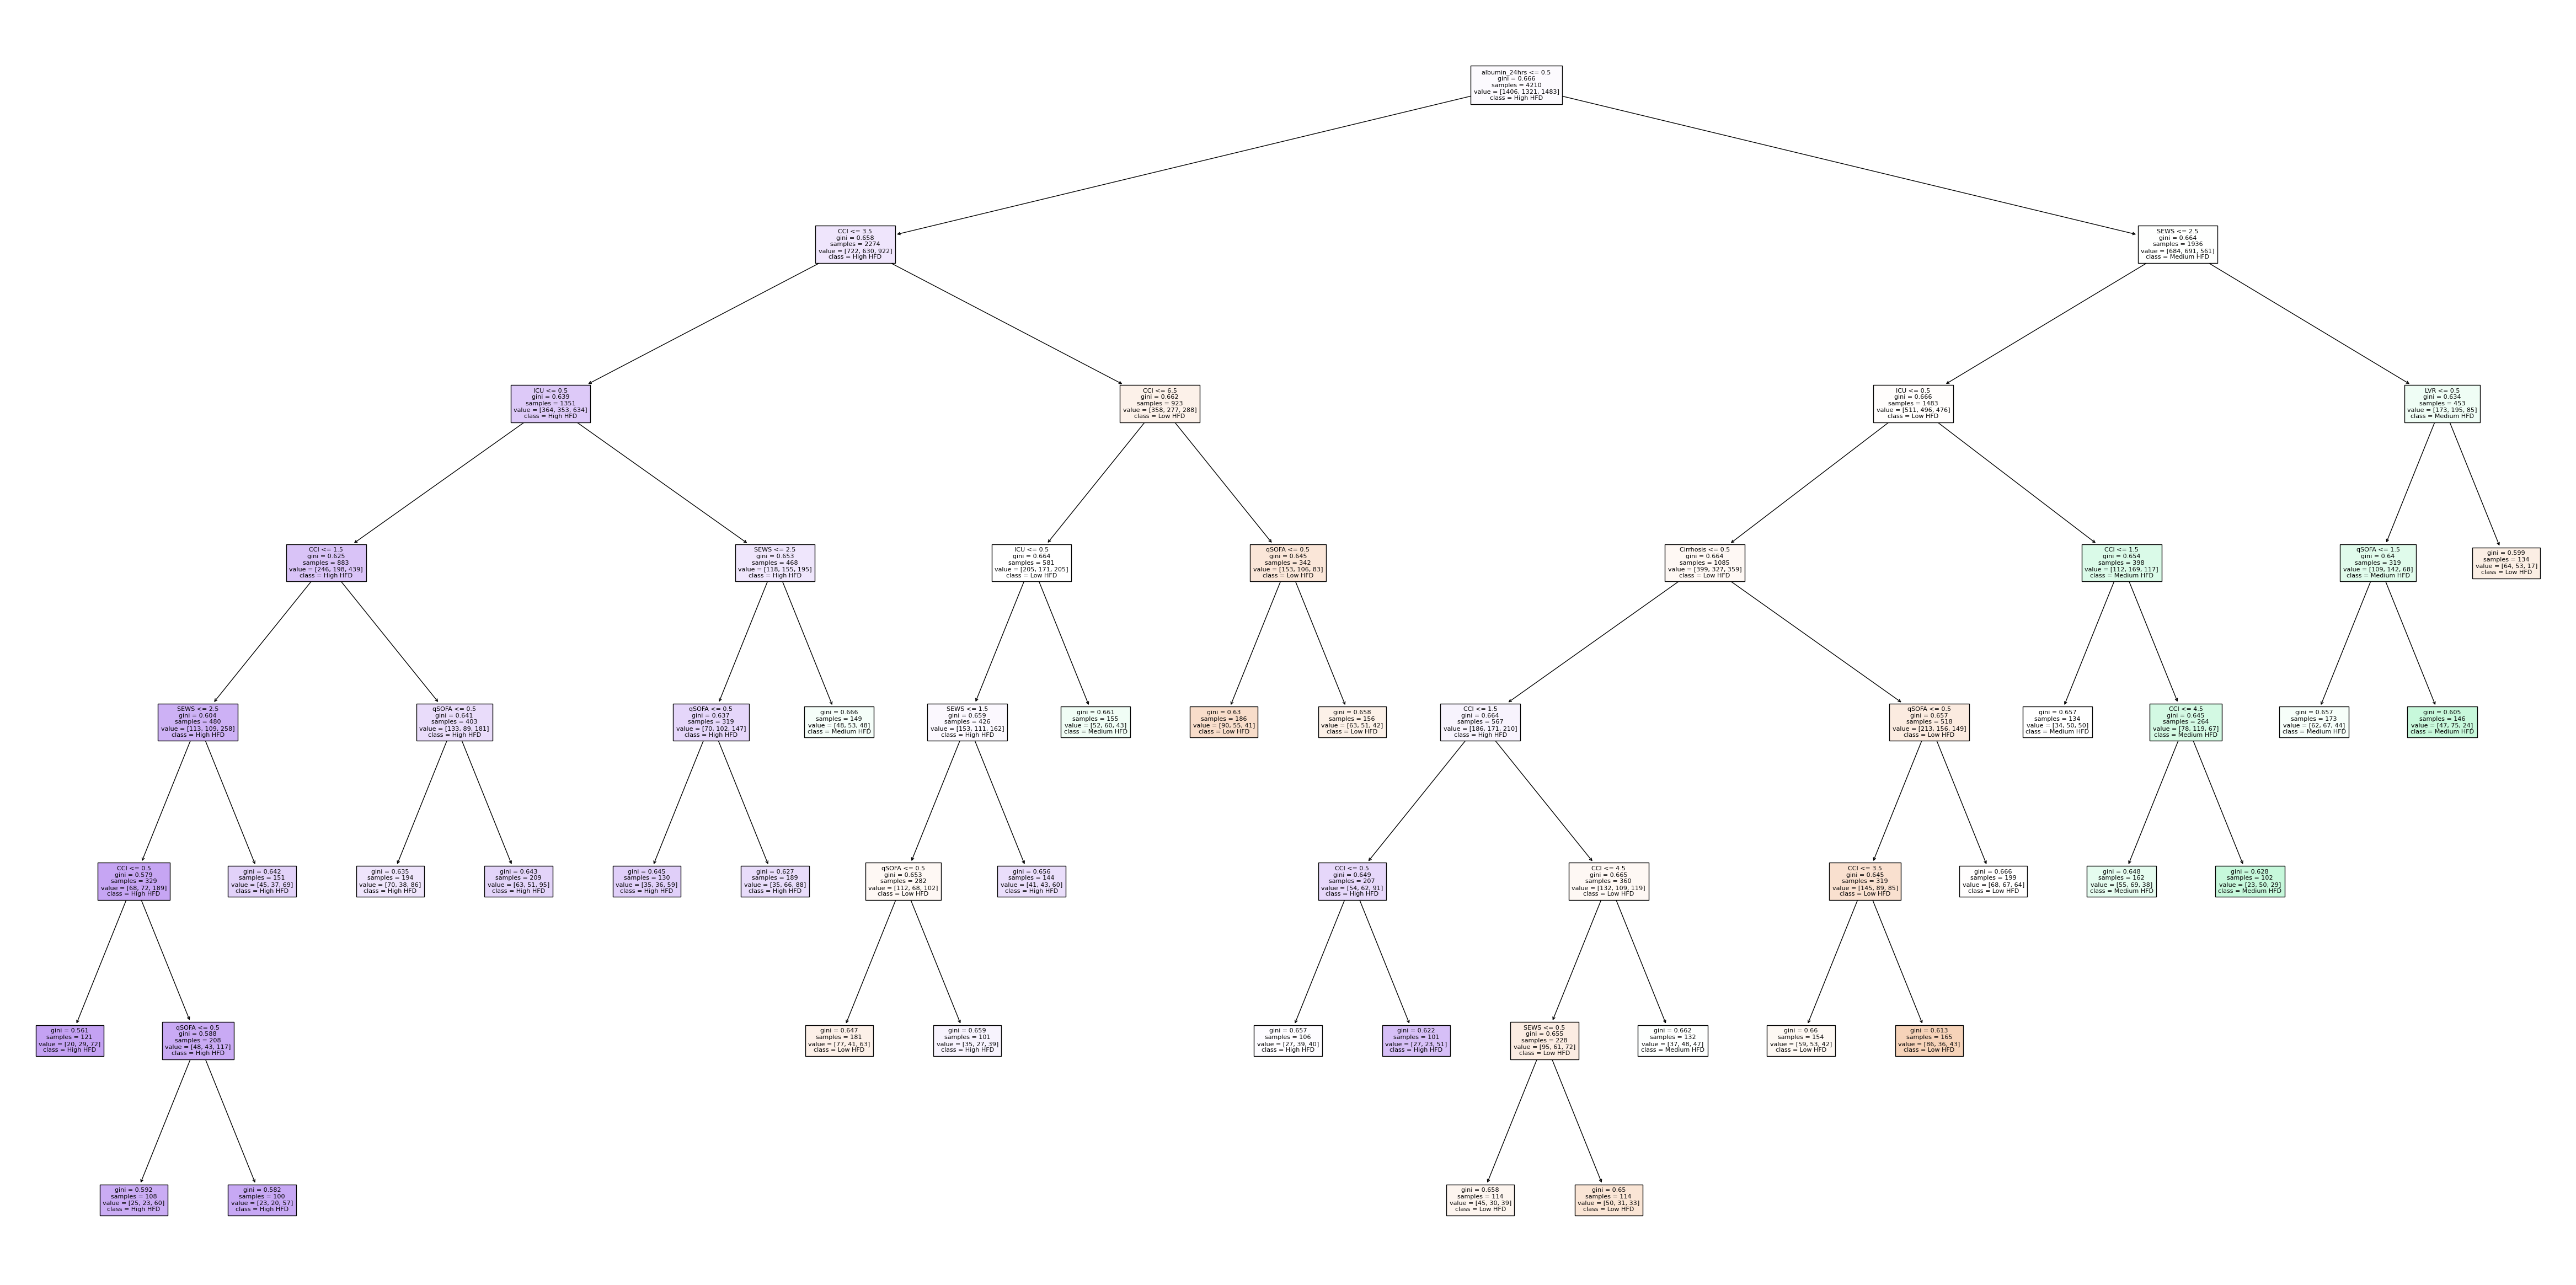

In [59]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [60]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D7_PSM_MATCHED_3.png')

True

## Random Forest

In [61]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [62]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [63]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[540 363 503]
 [360 482 479]
 [354 294 835]]


In [64]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.38      0.41      1406
           1       0.42      0.36      0.39      1321
           2       0.46      0.56      0.51      1483

    accuracy                           0.44      4210
   macro avg       0.44      0.44      0.43      4210
weighted avg       0.44      0.44      0.44      4210



In [65]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[120  97 128]
 [ 99 112 125]
 [101  69 202]]


In [66]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.38      0.35      0.36       345
           1       0.40      0.33      0.36       336
           2       0.44      0.54      0.49       372

    accuracy                           0.41      1053
   macro avg       0.41      0.41      0.40      1053
weighted avg       0.41      0.41      0.41      1053



Feature: ICU Score: 0.12675
Feature: Cirrhosis Score: 0.09373
Feature: CCI Score: 0.32346
Feature: qSOFA Score: 0.09799
Feature: SEWS Score: 0.12665
Feature: LVR Score: 0.02044
Feature: albumin_24hrs Score: 0.21098


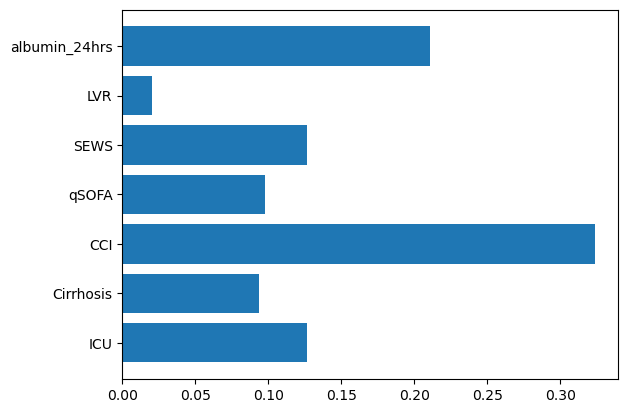

In [67]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()